In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
path ='/content/wine.csv'

df = pd.read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df.shape

(6497, 13)

In [ ]:
# 독립변수(x) : wine 속성
# 종속변수(y) : 와인분류라벨(red wine / white wine)

df[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# 학습 셋, 테스트 셋

x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
# 모델 구조 설정

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%pwd

'/content'

In [ ]:
# 모델 저장 설정
modelpath = '/content/data/model/all/{epoch:02d}-{val_accuracy:.04f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
# 모델 실행 (fit >> train data)

# history = model.fit(x_train, y_train, epochs=50, batch_size=500,
#                     validation_split=0.25)
#                     # train data의 25% >> validataion data로 활용

history = model.fit(x_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, callbacks=[early_stopping_callback,checkpointer ])
                    # train data의 25% >> validataion data로 활용

Epoch 1/50
1/8 [==>...........................] - ETA: 11s - loss: 6.8318 - accuracy: 0.2600
Epoch 1: val_loss improved from inf to 0.35590, saving model to /content/data/model/all/01-0.8769.hdf5
8/8 [==============================] - 2s 52ms/step - loss: 3.0709 - accuracy: 0.4095 - val_loss: 0.3559 - val_accuracy: 0.8769
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.8580
Epoch 2: val_loss did not improve from 0.35590
8/8 [==============================] - 0s 13ms/step - loss: 0.5038 - accuracy: 0.8301 - val_loss: 0.6434 - val_accuracy: 0.8115
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.6844 - accuracy: 0.7780

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.35590
8/8 [==============================] - 0s 9ms/step - loss: 0.6330 - accuracy: 0.8152 - val_loss: 0.5688 - val_accuracy: 0.8415
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.8560
Epoch 4: val_loss did not improve from 0.35590
8/8 [==============================] - 0s 7ms/step - loss: 0.4767 - accuracy: 0.8658 - val_loss: 0.3640 - val_accuracy: 0.9015
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.8900
Epoch 5: val_loss improved from 0.35590 to 0.31413, saving model to /content/data/model/all/05-0.8954.hdf5
8/8 [==============================] - 0s 13ms/step - loss: 0.3254 - accuracy: 0.9009 - val_loss: 0.3141 - val_accuracy: 0.8954
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8940
Epoch 6: val_loss improved from 0.31413 to 0.30264, saving model to /content/data/model/all/06-0.9054.hdf5
8/8 [============================

In [ ]:
# 테스트 결과 출력

score = model.evaluate(x_test, y_test)
print("Test Dataset ACC: ", round(score[1],2))
# Test Dataset ACC:  0.96

41/41 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9485
Test Dataset ACC:  0.95


In [ ]:
# 그래프로 과적합 여부 확인

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.070905,0.409546,0.355896,0.876923
1,0.503805,0.830126,0.643436,0.811538
2,0.633012,0.815242,0.568830,0.841538
3,0.476671,0.865794,0.364019,0.901538
4,0.325368,0.900949,0.314129,0.895385
5,0.324617,0.886066,0.302641,0.905385
6,0.294759,0.905568,0.293810,0.926154
7,0.283909,0.916602,0.282501,0.928462
8,0.265003,0.921221,0.264086,0.930769
9,0.255860,0.916859,0.259894,0.927692


In [ ]:
hist_df = pd.DataFrame(history.history)

# val_loss, val_acc 변화 보고 싶어요

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

# x값을 지정,검증용 셋의 오차 >> 빨간색, 학습용 셋의 오차 >> 파란색

np.arange(len(y_loss))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

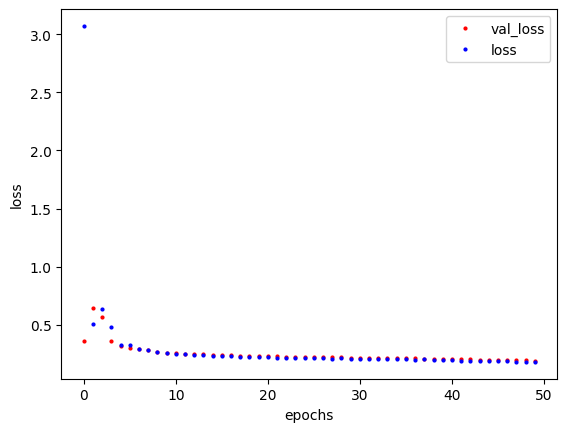

In [ ]:
x_len = np.arange(len(y_loss)) #x_len >> epochs

plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='val_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='loss')

plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test acc: ', round(score[1], 2))

41/41 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9485
Test acc:  0.95
